Introduction:

This is our Final Project for Big Ideas in Computing and Information in which we were tasked with finding the 'best' neighborhood in Pittsburgh. To determine the best neighborhood, we looked at a multitude of different datasets, which gave us many ideas for what our metric could be. We originally started out with finding the highest rent-to-income ratio among neighborhoods, but eventually landed on the best neighborhood to own a dog in. 

The Metric: 

For our final project we found the best city to own a dog in. To do this, we used the metrics of the number of parks, amount of traffic, and number of smart trash containers a neighborhood has. We decided on these metrics as parks are a great place to walk a dog, lots of traffic is unsafe for dogs, and trash containers are needed while walking a dog. With these three metrics combined we were able to figure out what the best niehgborhood to own a dog in is. Below are links of the datasets used in our investigation.

- https://data.wprdc.org/dataset/smart-trash-containers/resource/75b83ac9-8069-4cf1-bcc3-b9e6b04487d9
- https://data.wprdc.org/dataset/parks/resource/fa329e3d-89ff-4708-8ddf-81bfedcad11d/view/3dae5fa4-b30f-467c-84bc-f42e670b2fce
- 

**The Best Neighborhood**

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

First we need to import the datasets and preprocess/clean up the data for our use case. For each dataset, we will be looking for the neighborhood and our chosen statistic. 

Trash Containers

In [12]:
# import data set and get only the neighborhoods
containers = pd.read_csv('nfb25/trash-containers.csv')
containers = containers[['neighborhood']]
containers.head()

,neighborhood
0,Central Northside
1,Marshall-Shadeland
2,Central Northside
3,Allegheny Center
4,Central Northside


As this data contains each trash container along with the neighborhood it is in, after only keeping the neighborhoods, we are left with all the neighborhood occurances. This is great, but does not give us the count of each neighborhood in a useful way. 

In [13]:
# get count of each neighborhood
containers = containers['neighborhood'].value_counts()
data = {
  "neighborhood": containers.keys(),
  "count": containers.values
}

containers = pd.DataFrame(data)
containers.head()

,neighborhood,count
0,Shadyside,76
1,East Liberty,68
2,Squirrel Hill South,63
3,Bloomfield,58
4,North Shore,53


The code above counts each occurance of each neighborhood and totals them. These values are then placed in a new column labeled count, representing the total number of smart trash containers located in each neighborhood. These are then sorted from highest to lowest for easier usage. After cleanup, we are left with the chart below. 

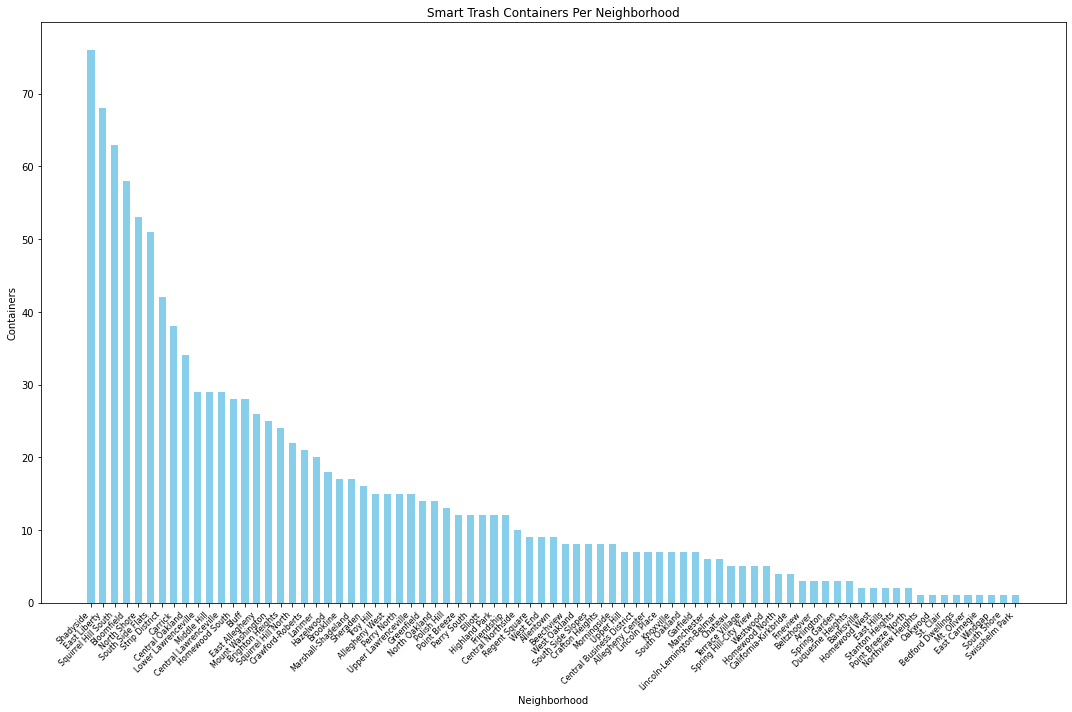

In [11]:
# display chart of trash containers
plt.figure(figsize=(15, 10))
plt.xlabel('Neighborhood')
plt.ylabel('Containers')
plt.bar(containers['neighborhood'], containers['count'], width = .6, color='skyblue')
plt.title('Smart Trash Containers Per Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

The chart above shows the number of smart trash containers located in each neighborhood. For our metric, the best neighborhood is located on the left as the more containers the better. Based on the data, Shadyside has the greatest number of smart trash containers, making it the best in this metric. 

Traffic

In [7]:
# import formatted traffic for testing
traffic = pd.read_csv('dantewarhola/traffic.csv')
traffic = traffic.rename(columns={'average_daily_car_traffic': 'traffic'})
traffic.head()

,_id,id,device_id,record_oid,count_start_date,count_end_date,traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,536,699716104,304,1.070642e+09,NaN,NaN,10001.0,NaN,NaN,StatTrak,...,-79.921299,40.443821,Squirrel Hill North,8.0,14.0,42003140300,3.0,14.0,4.0,2-18
1,695,2068404339,321,5.356643e+08,2020-11-05,2020-11-13,10113.0,NaN,5,StatTrak,...,-79.937376,40.453982,Shadyside,8.0,7.0,42003070900,2.0,7.0,4.0,3-22
2,19,1159852619,118,1.024536e+09,2019-07-09,2019-07-12,10350.0,NaN,12,StatTrak,...,-80.001937,40.447849,North Shore,1.0,22.0,42003563200,6.0,22.0,1.0,1-20
3,235,1084152705,230,1.951529e+09,2020-01-23,2020-01-31,1036.0,NaN,4,StatTrak,...,-79.924263,40.435829,Squirrel Hill South,5.0,14.0,42003141300,3.0,14.0,4.0,2-21
4,208,619209258,225,1.008927e+09,2019-12-30,2020-01-14,1043.0,NaN,5,StatTrak,...,-80.028303,40.472465,Marshall-Shadeland,1.0,27.0,42003271500,1.0,27.0,1.0,1-14


The code above shows the average daily per traffic neighborhood in Pittsburgh. There is a lot of information insiode this dataframe that we do not need.

In [9]:
df = pd.read_csv('dantewarhola/traffic.csv')
df = df[['average_daily_car_traffic', 'neighborhood']]

# Convert 'None' to NaN and sort the DataFrame
df_sorted = df.replace('None', pd.NA).sort_values(by='average_daily_car_traffic', ascending=True)

# Convert the column to integers, handling NaN values
columns_to_convert = ['average_daily_car_traffic']

for col in columns_to_convert:
    df_sorted[col] = pd.to_numeric(df_sorted[col], errors='coerce').astype('Int64')

df_sorted = df_sorted.groupby('neighborhood', as_index=False).mean().sort_values(by="average_daily_car_traffic").dropna()

df_sorted.head()

,neighborhood,average_daily_car_traffic
57,South Side Flats,115.0
34,Lincoln Place,126.0
35,Lincoln-Lemington-Belmar,195.0
25,Fineview,419.0
1,Allegheny West,477.0


I then was able to remove all of the useless information from the dataframe and organize it in ascending order.

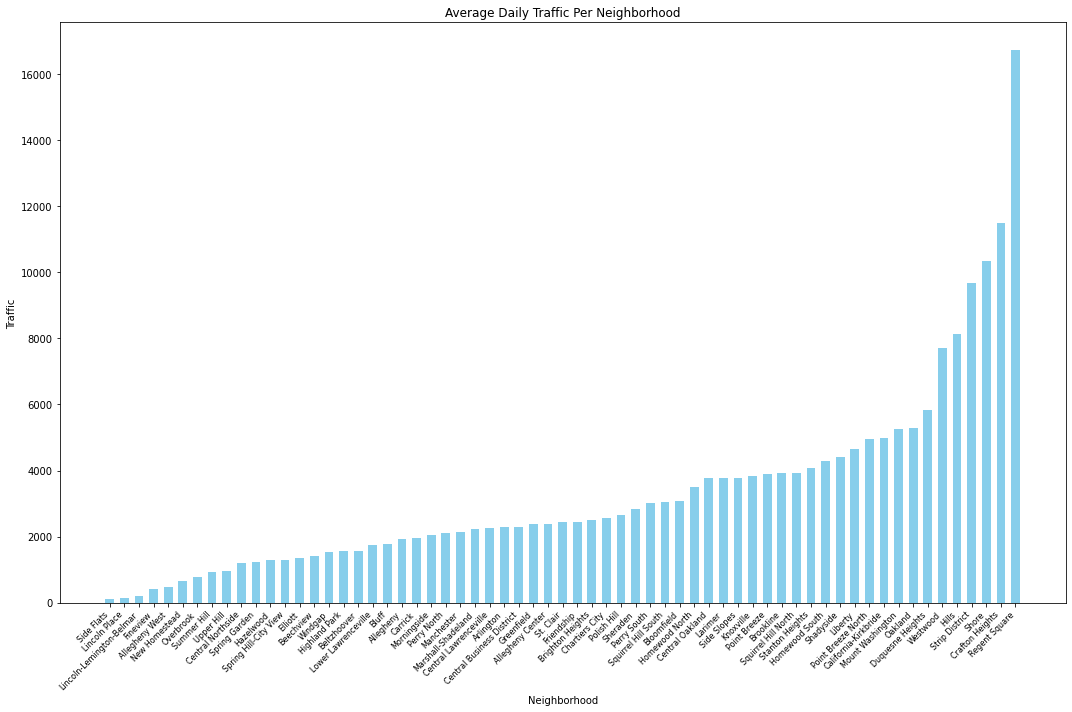

In [15]:
#display chart of trash containers
plt.figure(figsize=(15, 10))
plt.xlabel('Neighborhood')
plt.ylabel('Traffic')
plt.bar(traffic['neighborhood'], traffic['average_daily_car_traffic'], width = .6, color='skyblue')
plt.title('Average Daily Traffic Per Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

The chart above shows the daily average traffic count per neighborhood. As traffic is unsafe for dogs, the best neighborhood is located on the left side of the chart. Based on this, the best neighborhood to own a dog based on traffic would be the Side Flats. 

Parks

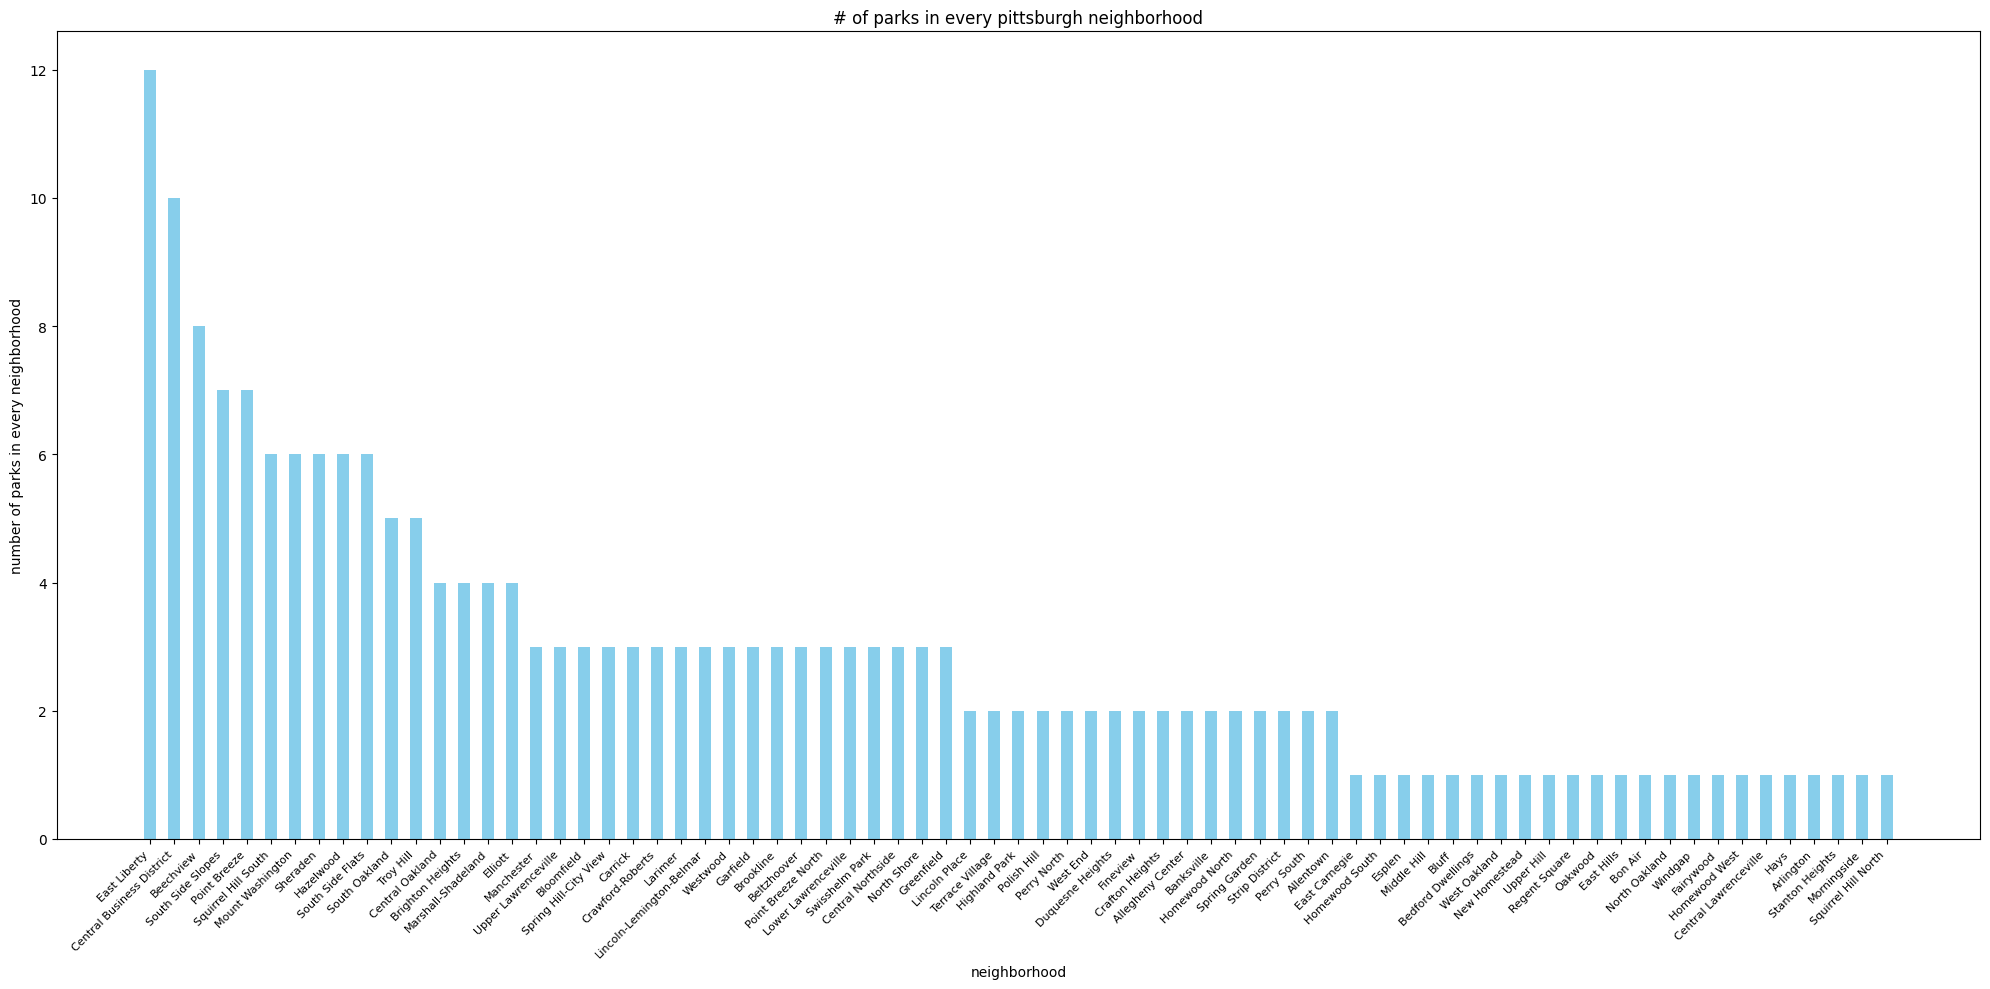

In [6]:
#display chart of parks 
#Reading the data
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/roger/Documents/GitHub/Big-Ideas-in-Computing-and-Information-Group-38-Final-Project/ROW03/Park.csv')
#ONly reading the name and neighborhood column 
df = df[['name', 'neighborhood']]
plt.figure(figsize = (20,10))
#Counting the that the neighborhood appears 
numberofparks = df['neighborhood'].value_counts()
#Making the x-axis neighborhood and the y-axis number of parks in every neighborhood 
plt.xlabel('neighborhood')
plt.ylabel('number of parks in every neighborhood')
#Designing the graph 
plt.bar(numberofparks.index, numberofparks, width = 0.5, color = 'skyblue')
plt.title('# of parks in every pittsburgh neighborhood')
plt.xticks(rotation = 45, ha = 'right', fontsize = 8)
plt.tight_layout()
plt.show()

The chart above shows the neighborhood names on the x axis and the number of parks in each neighborhood, in order to determine the best neighborhood to own a dog, the more park the better because more parks allows dogs to enjoy running around without a leash and interacting with other dogs and people as well. 

Since each metric is very different, we need some way to incorporate all of the metrics. In order to combine the metrics to get the best neighborhood, we used the pandas function 'rank', which allowed us to compute the best neighborhood. As this process incorporates all three metrics, we needed to include weights for each of the metrics. These weights allowed us to involve all three metrics and make sure that each of them contributed to the final result. 

In [34]:
all = pd.merge(containers, traffic, on='neighborhood')
all['average_daily_car_traffic'] = all['average_daily_car_traffic'] * -1
all['rank'] = (all['count'] * 50 + all['average_daily_car_traffic']).rank(ascending=False).astype('int64')
all = all.sort_values(by='rank')
print(all)

# will need to mess around with the weights/how the ranking system works

                 neighborhood  count  average_daily_car_traffic  rank
18             Allegheny West     15                -477.000000     1
35              Lincoln Place      7                -126.000000     2
38   Lincoln-Lemington-Belmar      6                -195.000000     3
1         Squirrel Hill South     63               -3050.076923     4
4                     Carrick     38               -1969.571429     5
2                  Bloomfield     58               -3078.642857     6
43                   Fineview      3                -419.000000     7
6         Lower Lawrenceville     29               -1736.000000     8
9                       Bluff     28               -1788.333333     9
14                  Hazelwood     18               -1289.500000    10
32                 Upper Hill      7                -953.333333    11
0                   Shadyside     76               -4408.800000    12
27          Central Northside     10               -1189.000000    13
24                  

Conclusion 

Based on all the data presented, we have come to the conclusion that based on the number of smart trash containers, average daily traffic, and the number of parks, that the best neighborhood to own a dog is __________.